In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
from mpl_bsic import apply_bsic_logo, apply_bsic_style, export_figure
from src.features_transformations.fractional_differentiation import find_stat_series

In [3]:
cdata = pd.read_csv('data/fundamentals_clean.csv')
cdata.head()

,public_date,permno,CAPEI,bm,evm,pe_op_basic,pe_op_dil,pe_exi,pe_inc,ps,...,rect_turn,pay_turn,sale_invcap,sale_equity,rd_sale,adv_sale,staff_sale,accrual,ptb,divyield
0,2000-01-31,10078,189.489,0.071,18.262,97.593,103.372,109.115,109.115,9.857,...,5.683,9.049,2.698,2.698,0.102,0.021,0.0,-0.169,23.938,0
1,2000-02-29,10078,212.849,0.044,30.642,225.444,238.125,247.403,247.403,11.271,...,6.075,8.114,2.602,2.602,0.102,0.021,0.0,-0.185,25.045,0
2,2000-03-31,10078,212.787,0.044,30.642,221.783,234.258,243.385,243.385,11.267,...,6.075,8.114,2.602,2.602,0.102,0.021,0.0,-0.185,25.038,0
3,2000-04-30,10078,209.069,0.044,30.642,217.604,229.844,238.799,238.799,11.070,...,6.075,8.114,2.602,2.602,0.102,0.021,0.0,-0.185,24.601,0
4,2000-05-31,10078,160.218,0.044,37.098,155.584,166.576,168.407,168.407,8.547,...,6.324,8.451,2.544,2.544,0.100,0.021,0.0,-0.150,18.659,0


In [15]:
initial_shape = cdata.shape[0]

In [22]:
import pandas as pd

pd.set_option("display.max_rows", 1000)


(cdata.isna().sum().sort_values(ascending=False) / initial_shape) > 0.07

inv_turn           True
invt_act           True
int_debt           True
pretret_earnat     True
pretret_noa        True
rect_act           True
ocf_lct            True
curr_debt          True
profit_lct         True
curr_ratio         True
quick_ratio        True
cash_ratio         True
int_totdebt        True
intcov_ratio       True
intcov             True
efftax             True
dpr                True
short_debt        False
fcf_ocf           False
roe               False
sale_equity       False
dltt_be           False
pay_turn          False
ptb               False
bm                False
pe_exi            False
pe_op_dil         False
pe_inc            False
pe_op_basic       False
rect_turn         False
aftret_invcapx    False
lt_ppent          False
CAPEI             False
debt_capital      False
cash_debt         False
debt_ebitda       False
cfm               False
roce              False
totdebt_invcap    False
evm               False
debt_invcap       False
debt_at         

In [3]:
prices = pd.read_csv('data/prices_processed.csv')
stat = pd.read_csv('data/DATA_STATIONARY.zip')

/var/folders/3r/t8b8j58n2hl6cxp_9t3pf6880000gn/T/ipykernel_80303/3990418799.py:1: DtypeWarning: Columns (17,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  prices = pd.read_csv('data/prices_processed.csv')


In [23]:
data_stat = pd.read_csv('data/DATA_STATIONARY.zip')

In [26]:
features = [
'inv_turn',
'invt_act'   ,        
'int_debt'   ,        
'pretret_earnat'  ,   
'pretret_noa'  ,
'rect_act'    , 
'ocf_lct'    ,  
'curr_debt'   , 
'profit_lct' ,  
'curr_ratio'  , 
'quick_ratio' , 
'cash_ratio'  , 
'int_totdebt' , 
'intcov_ratio', 
'intcov' ,      
'efftax' ,      
'dpr'  ,        
]
data_stat = data_stat.drop(features, axis=1)

In [27]:
data_stat.head()

,permno,CAPEI,bm,evm,pe_op_basic,pe_op_dil,pe_exi,pe_inc,ps,pcf,...,vol,ret,retx,mktcap,prc_adj,naics_processed,ret_industry_tot,ret_industry_relative,MACD_index,rsi
0,10078,189.489,NaN,18.262,97.593,103.372,109.115,109.115,NaN,NaN,...,15724295.0,0.027844,0.027844,NaN,NaN,NaN,NaN,NaN,1.928924,50.010735
1,10078,189.489,NaN,18.262,97.593,103.372,109.115,109.115,NaN,NaN,...,14631907.0,0.006192,0.006192,NaN,NaN,NaN,NaN,NaN,1.903350,51.272636
2,10078,189.489,NaN,18.262,97.593,103.372,109.115,109.115,NaN,NaN,...,15465462.0,0.030769,0.030769,NaN,NaN,NaN,NaN,NaN,1.994395,57.466949
3,10078,189.489,NaN,18.262,97.593,103.372,109.115,109.115,NaN,NaN,...,16535362.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,2.149216,57.466949
4,10078,189.489,NaN,18.262,97.593,103.372,109.115,109.115,NaN,NaN,...,10953336.0,0.023881,0.023881,NaN,NaN,NaN,NaN,NaN,2.394813,62.539019


In [28]:
data_stat.to_csv('data/DATA_FINAL.csv',index=False)

In [15]:
mask = prices['ticker'] == 'TSLA'
prices[mask]

,permno,date,nameendt,shrcd,exchcd,siccd,ticker,comnam,tsymbol,naics,...,vol_21d,ret_vol_adj,mktcap,prc_adj,naics_processed,ret_industry_tot,ret_industry_relative,MACD_index,rsi,in_sp500
3887248,93436,2010-06-30,NaN,11,3,9999,TSLA,TESLA MOTORS INC,TSLA,336111.0,...,0.012671,-0.225274,2.220908e+06,1.588667,33.0,-0.594585,0.369312,NaN,NaN,0
3887249,93436,2010-07-01,NaN,11,3,9999,TSLA,TESLA MOTORS INC,TSLA,336111.0,...,0.021097,-6.434279,2.046628e+06,1.464000,33.0,-0.378534,-6.055745,-6.680047,3.418945,0
3887250,93436,2010-07-02,NaN,11,3,9999,TSLA,TESLA MOTORS INC,TSLA,336111.0,...,0.033641,-8.622226,1.789402e+06,1.280000,33.0,-0.258395,-8.363831,-11.867362,3.414495,0
3887251,93436,2010-07-06,NaN,11,3,9999,TSLA,TESLA MOTORS INC,TSLA,336111.0,...,0.046823,-9.064214,1.501420e+06,1.074000,33.0,0.319899,-9.384113,-17.232210,3.408764,0
3887252,93436,2010-07-07,NaN,11,3,9999,TSLA,TESLA MOTORS INC,TSLA,336111.0,...,0.046811,-1.081464,1.472528e+06,1.053333,33.0,2.058364,-3.139828,-22.388153,3.408102,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3890642,93436,2023-12-22,NaN,11,3,9999,TSLA,TESLA INC,TSLA,336110.0,...,0.020859,-0.216962,8.028047e+08,252.539990,33.0,0.003517,-0.220480,4.421230,58.473892,1
3890643,93436,2023-12-26,NaN,11,3,9999,TSLA,TESLA INC,TSLA,336110.0,...,0.021031,0.460128,8.157429e+08,256.609990,33.0,0.315202,0.144926,4.636162,63.398606,1
3890644,93436,2023-12-27,NaN,11,3,9999,TSLA,TESLA INC,TSLA,336110.0,...,0.021262,0.537571,8.310971e+08,261.440000,33.0,0.106531,0.431040,4.915272,68.511971,1
3890645,93436,2023-12-28,NaN,11,3,9999,TSLA,TESLA INC,TSLA,336110.0,...,0.020625,-0.921474,8.048392e+08,253.179990,33.0,0.008914,-0.930388,5.076989,53.706654,1


In [52]:
permno = 93436

def plot(permno): 
    mask_prices = prices['permno'] == permno
    mask_stat = stat['permno'] == permno
    
    prices_unadj = prices.loc[mask_prices, 'prc']
    prices_adj = prices.loc[mask_prices, 'prc_adj']
    prices_stat = stat.loc[mask_stat, 'prc_adj']

    index_prices = prices.loc[mask_prices, 'date']
    index_stat = stat.loc[mask_stat, 'date'] 

    fig, ax = plt.subplots()
    apply_bsic_style(fig, ax)
    ax.plot(index_prices, prices_unadj, label='Unadjusted Prices')
    ax.plot(index_prices, prices_adj, label='Adjusted Prices')
    ax.plot(index_stat, prices_stat, label='Stationary Prices')

    ax.legend()

    plt.show()

plot(permno)



NameError: name 'prices' is not defined

0 333
333 666
666 999


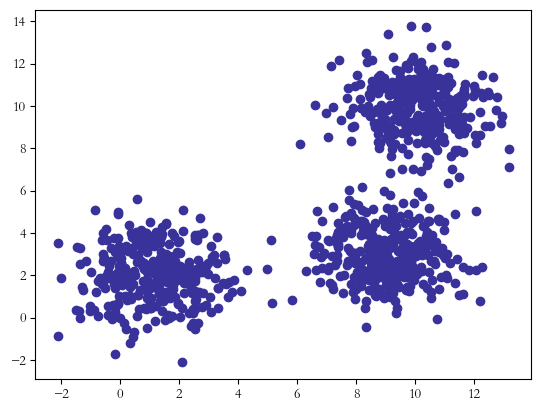

In [127]:
centers = [(1,2), (10, 10), (9,3)]

n = 1000
x = np.zeros(n)
y = np.zeros(n)

indices = np.linspace(0, n - 1, len(centers) + 1, dtype=int)

for i in range(1,len(indices)): 
    i_0, i_1 = indices[i], indices[i-1]
    print(i_1, i_0)

    x[i_1:i_0] = np.random.normal(centers[i-1][0], 1.25, i_0 - i_1)
    y[i_1:i_0] = np.random.normal(centers[i-1][1], 1.25, i_0 - i_1)
p = np.random.permutation(n)
zipped = np.column_stack((x, y))[p]

plt.scatter(x,y)

In [133]:
new_points[(new_points[:, 0] < 1) & (new_points[:, 0] > 0)]

array([[ 0.46063787,  1.57323167],
       [ 0.35458984,  1.74757065],
       [ 0.09273161,  2.26202496],
       [ 0.57704335,  5.58239809],
       [ 0.82524284,  2.35752397],
       [ 0.54183532,  4.05033569],
       [ 0.06491738,  1.55258932],
       [ 0.91520076,  0.43541598],
       [ 0.10261734,  1.848251  ],
       [ 0.46744206, -0.67816564]])

In [1]:
from sklearn.cluster import KMeans

cutoff = int(0.15 * n)

points = zipped[:-cutoff]
new_points = zipped[-cutoff:]

# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters=3)
# Fit model to points
model.fit(points)
# Determine the cluster labels of new_points: labels
labels = model.predict(new_points)
colors = ["#601E66", "#0E0B54", "#8EC6FF"]

# Import pyplot
import matplotlib.pyplot as plt
# Assign the columns of new_points: xs and ys
xs = new_points[:,0]
ys = new_points[:,1]

fig, ax = plt.subplots()
ax.set_title('K-Means Clustering for Principal Components')
apply_bsic_style(fig, ax)
apply_bsic_logo(fig, ax)

# Make a scatter plot of xs and ys, using labels to define the colors
ax.scatter(xs,ys,c=[colors[i] for i in labels],alpha=0.5)
# Assign the cluster centers: centroids
centroids = model.cluster_centers_
# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]
# Make a scatter plot of centroids_x and centroids_y
ax.scatter(centroids_x, centroids_y, marker="D", s=40, c="#38329A")

arrowprops = dict(arrowstyle="->")
centroid_highlighted = centroids[centroids[:, 0] < 2][0]
point_highlighted = [0.57704335, 5.58239809]
linex = (point_highlighted[0], centroid_highlighted[0])
liney = (point_highlighted[1], centroid_highlighted[1])
midpoint = ((linex[0] + linex[1]) / 2, (liney[0] + liney[1]) / 2)

ax.annotate(
    "Principal Component",
    xy=point_highlighted,
    xytext=(1.2, 9),
    arrowprops=arrowprops,
)

ax.annotate(
    "Centroid", 
    xy=centroid_highlighted,
    xytext=(4,4),
    arrowprops=arrowprops,
)

ax.annotate(
    "Ranked based on distance", 
    xy=midpoint,
    xytext=(3.5,7),
    arrowprops=arrowprops,
)

plt.plot(linex, liney)
plt.show()

export_figure(fig, 'test')

NameError: name 'n' is not defined